In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
### get main path, loop over main parameters, read the files, save the mean and std 
eijslist = [3.2,4.0,4.8,6.0]
aslist = [20000,50000,100000]
stlist = [400000,1000000,5000000]
setlist = [1,2,3,4,5,6,7,8]

mainpath = '/Data1/chromosome_modelling/prepSurf_perturb_reprog/'
outdir = 'rejuv_heatmaps/'

360000.0 400000
360000.0 400000
360000.0 400000
360000.0 400000
900000.0 1000000
900000.0 1000000
900000.0 1000000
900000.0 1000000
4500000.0 5000000
4500000.0 5000000
4500000.0 5000000
4500000.0 5000000
360000.0 400000
360000.0 400000
360000.0 400000
360000.0 400000
900000.0 1000000
900000.0 1000000
900000.0 1000000
900000.0 1000000
4500000.0 5000000
4500000.0 5000000
4500000.0 5000000
4500000.0 5000000
360000.0 400000
360000.0 400000
360000.0 400000
360000.0 400000
900000.0 1000000
900000.0 1000000
900000.0 1000000
900000.0 1000000
4500000.0 5000000
4500000.0 5000000
4500000.0 5000000
4500000.0 5000000
360000.0 400000
360000.0 400000
360000.0 400000
360000.0 400000
900000.0 1000000
900000.0 1000000
900000.0 1000000
900000.0 1000000
4500000.0 5000000
4500000.0 5000000
4500000.0 5000000
4500000.0 5000000


/tmp/ipykernel_11047/2788556690.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.ax.set_yticklabels([f'{x:.2f}' for x in cbticklabels],size=18)


360000.0 400000
360000.0 400000
360000.0 400000
360000.0 400000
900000.0 1000000
900000.0 1000000
900000.0 1000000
900000.0 1000000
4500000.0 5000000
4500000.0 5000000
4500000.0 5000000
4500000.0 5000000
360000.0 400000
360000.0 400000
360000.0 400000
360000.0 400000
900000.0 1000000
900000.0 1000000
900000.0 1000000
900000.0 1000000
4500000.0 5000000
4500000.0 5000000
4500000.0 5000000
4500000.0 5000000
360000.0 400000
360000.0 400000
360000.0 400000
360000.0 400000
900000.0 1000000
900000.0 1000000
900000.0 1000000
900000.0 1000000
4500000.0 5000000
4500000.0 5000000
4500000.0 5000000
4500000.0 5000000
360000.0 400000
360000.0 400000
360000.0 400000
360000.0 400000
900000.0 1000000
900000.0 1000000
900000.0 1000000
900000.0 1000000
4500000.0 5000000
4500000.0 5000000
4500000.0 5000000
4500000.0 5000000
360000.0 400000
360000.0 400000
360000.0 400000
360000.0 400000
900000.0 1000000
900000.0 1000000
900000.0 1000000
900000.0 1000000
4500000.0 5000000
4500000.0 5000000
4500000.0 500000

<Figure size 640x480 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

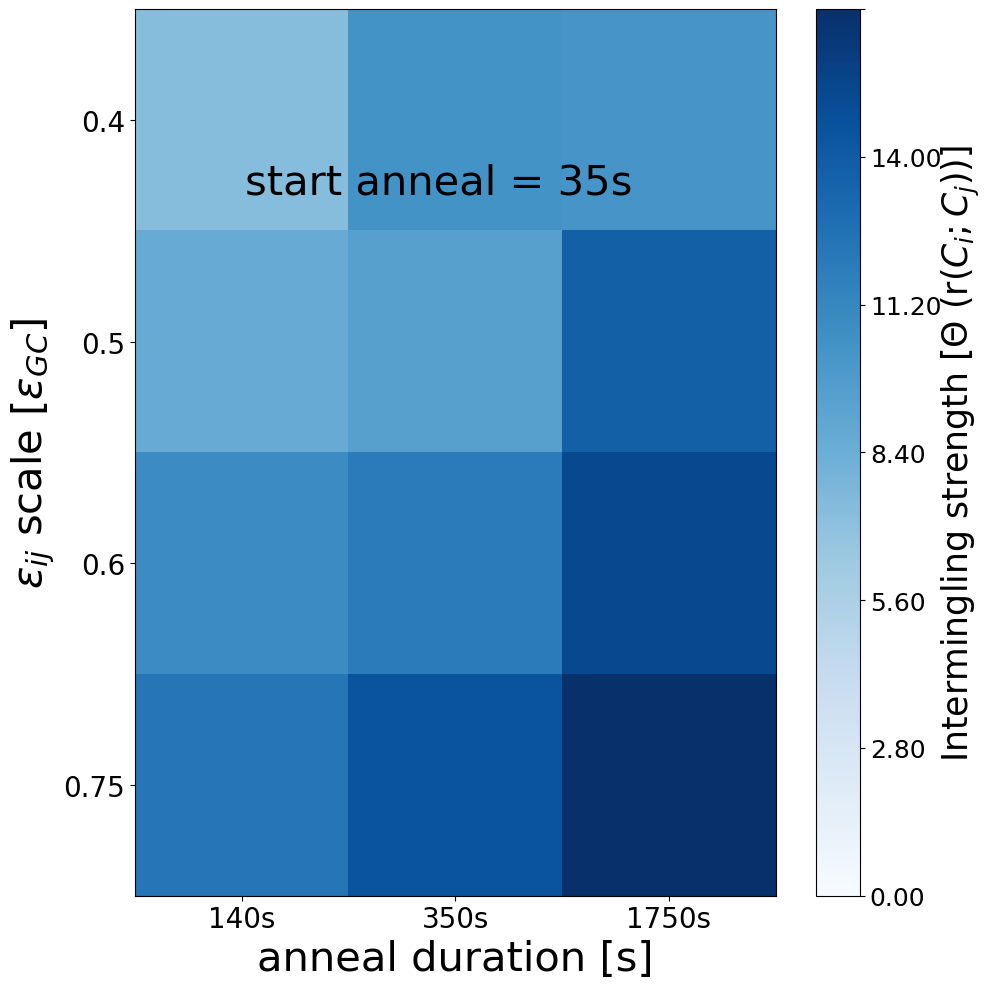

In [12]:
for sa in aslist:

    mat = np.zeros([len(eijslist),len(stlist),2],np.float64)
    for i in range(len(eijslist)):
        eijs = eijslist[i]
        
        eijstr = f'{eijs:.1f}'
        if eijs == 6.0:
            eijstr = f'{eijs:.2f}'
        for j in range(len(stlist)):
            st = stlist[j]
            data = []
            for set in setlist:
                dirpath = mainpath + 'Set_'+str(set)+'_insph3_sph_Tp0.2/'
                dirpath = dirpath + "46ch_T0.0001_sga0.02_sgd0.001_epb8_epa"+ eijstr + \
                "_epm4.0_lmn0.0001_sfdf0.001_sgat1_as0.6_sa"+str(sa)+"_tl"+str(st)+"/"
    
                filename = dirpath + "Conf-thermo.dat"
#                 print(filename)
        
        
                infile = open(filename,"r")
                lines = infile.readlines()
                print(st - 0.1*st, st)
                for line in lines[:]: ## last 1000 lines
                    tokens = line.split()
                    if int(tokens[0]) > st - 0.1*st and int(tokens[0]) < st:
                        data.append(float(tokens[1])) ## IM En

            ## get mean and std from all sets
            meandata = np.mean(np.array(data))
            stddata = np.std(np.array(data))
            mat[i,j,0] = meandata
            mat[i,j,1] = stddata


    ### having completed filling up mat, plot the two things
    plt.clf()
    fig,axs=plt.subplots(nrows=1, ncols=1,sharex=True,sharey=True,figsize=(10,10),gridspec_kw={'width_ratios': [0.8]})
    im1 = axs.imshow(-mat[:,:,0],vmin = 0,vmax =12,aspect='auto',cmap='Blues')
    xaxis = [f'{f*0.35*0.001:.0f}s' for f in stlist]
    yaxis = [e/8 for e in eijslist]
    cb = fig.colorbar(im1)
    cbticklabels = list(np.linspace(0,14,6))
    cb.ax.set_yticklabels([f'{x:.2f}' for x in cbticklabels],size=18)
    cb.set_label("Intermingling strength [$\Theta$ (r($C_i;C_j$))]", labelpad=-1, size=25)
##    print(xaxis,yaxis)
    axs.set_xticks(list(range(len(xaxis))))
    axs.set_yticks(list(range(len(yaxis))))
    axs.set_xticklabels(xaxis, fontsize=20)
    axs.set_yticklabels(yaxis, fontsize=20)
    axs.set_ylabel("$\epsilon_{ij}$ scale [$\epsilon_{GC}$]",fontsize=30)
    axs.set_xlabel("anneal duration [s]",fontsize=30)
    plt.figtext(0.25,0.8, f'start anneal = {sa*0.35*0.001:.0f}s',size=30)
    plotfile = outdir + "rejuv_heatmap_sa"+str(sa)+".png"
    plt.tight_layout()
    
    plt.savefig(plotfile)
    
    ### have to set plot params, z axis range, etc. remember that eij is in units of 1/eijs

In [ ]:
# #### this section is to plot the time series


# for sa in aslist:

#     mat = np.zeros([len(eijslist),len(stlist),2],np.float64)
#     for i in range(len(eijslist)):
#         eijs = eijslist[i]
        
#         eijstr = f'{eijs:.1f}'
#         if eijs == 6.0:
#             eijstr = f'{eijs:.2f}'
#         for j in range(len(stlist)):
#             st = stlist[j]
#             data = []
#             for set in setlist:
#                 dirpath = mainpath + 'Set_'+str(set)+'_insph3_sph_Tp0.2/'
#                 dirpath = dirpath + "46ch_T0.0001_sga0.02_sgd0.001_epb8_epa"+ eijstr + \
#                 "_epm4.0_lmn0.0001_sfdf0.001_sgat1_as0.6_sa"+str(sa)+"_tl"+str(st)+"/"
    
#                 filename = dirpath + "Conf-thermo.dat"
# #                 print(filename)



# for eijs in eijslist:

#     dataseries = []
#     plt.clf()
#     for i in range(len(aslist)):
#         sa = aslist[i]
#         for j in range(len(stlist)):
#             st = stlist[j]

#             ### find out size of data
#             mainpath = '/Data1/chromosome_modelling/prepSurf_perturb/Set_'+str(setlist[0])+'_in3_ell_Tp0.0001/'
#             dir = mainpath + "46ch_T0.0001_sga0.001_sgd0.001_epb16_epa"+f'{eijs:.1f}'+"_epm8.0_lmn0.1_sfdf0.001_sgat2_as0/"

#             filename = dir + "Conf-thermo.dat"
#             infile = open(filename,"r")
#             lines = infile.readlines()

#             data = np.zeros([len(setlist),len(lines),2],np.float64)
#             for k in range(len(setlist)):
#                 set = setlist[k]
#                 mainpath = '/Data1/chromosome_modelling/prepSurf_perturb/Set_'+str(set)+'_in3_ell_Tp0.0001/'
#                 dir = mainpath + "46ch_T0.0001_sga0.001_sgd0.001_epb16_epa"+f'{eijs:.1f}'+"_epm8.0_lmn0.1_sfdf0.001_sgat2_as0/"
    
#                 filename = dir + "Conf-thermo.dat"
#                 infile = open(filename,"r")
#                 lines = infile.readlines()
#                 counter = 0
#                 for line in lines:
#                     tokens = line.split()
#                     data[k,counter,0] = float(tokens[0])
#                     data[k,counter,1] = float(tokens[1])

#             ### average over sets
#             datamean = np.mean(data,axis=0)
#             datastd = np.std(data,axis=0)
#             # plt.plot(datamean[:,0],datamean[:,1]
#             plt.errorbar(datamean[:,0],datamean[:,1],datastd[:,1])
#             plt.xscale('log')
#             ### save the plot on approriate name

FileNotFoundError: [Errno 2] No such file or directory: '/Data1/chromosome_modelling/prepSurf_perturb/Set_1_in3_ell_Tp0.0001/46ch_T0.0001_sga0.001_sgd0.001_epb16_epa3.2_epm8.0_lmn0.1_sfdf0.001_sgat2_as0/Conf-thermo.dat'

<Figure size 640x480 with 0 Axes>